# Pandas I - Working with DataFrames
Agenda today:
- Getting started with Pandas
- select data using pandas
- manipulate dataframes using pandas
- aggregating in pandas
- Case Study - Exploratory data analysis
<img src="Screen%20Shot%202019-02-10%20at%209.22.00%20PM.png" alt="Drawing" style="width: 400px;"/><br>


## 1 Pandas Basics 

In [274]:
# importing the necessary pacakges
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [275]:
# creating a dataframe from scratch 
# syntax: pd.DataFrame()
# df 1 will be consist of index of numeric values and columns of numeric and categorical values
grades_dict = {
                     "Project_1_Grade":np.random.randint(low=80,high=89,size=6),
                     "Project_2_Grade":np.random.randint(low=72,high=95,size=6),
                     "Project_3_Grade":np.random.randint(low=80,high=99,size=6),
                     "Project_4_Grade":np.random.randint(low=75,high=95,size=6),
                      }
grades = pd.DataFrame(grades_dict,
                    index = ['Justin','Rima','Derrick','Abdul','Luke','Lois'])
grades

,Project_1_Grade,Project_2_Grade,Project_3_Grade,Project_4_Grade
Justin,88,91,94,90
Rima,83,87,93,86
Derrick,84,76,87,84
Abdul,88,79,96,90
Luke,82,90,84,77
Lois,83,84,81,94


In [276]:
# saving data to an excel file: 
grades.to_excel('grades.xlsx')

In [277]:
# saving data to csv
grades.to_csv('grades.csv')

Two types of objects in Pandas:
- __Series__: one-dimensional object capable of storing any data structure 
- __DataFrame__: two-dimensional object capable of storing any data structure

Different types of index in Pandas:
- Numbers
- Strings
- Datetime (will be covered tomorrow)
- Multilevel indexing (will be covered tomorrow)

In [278]:
# example of using strings as index
my_df2 = pd.DataFrame({"A":[1,2,4,5],
                     "B":[7,8,9,10],
                     "C":[3,4,6,10],
                     "D":[11,10,9,19],
                     "E":['str1','STR2','stR3','sTR4'],
                     "F":[np.nan,np.nan,'No','13']},
                     index = ['foo1','foo2','foo3','foo4'])

In [279]:
my_df2

,A,B,C,D,E,F
foo1,1,7,3,11,str1,NaN
foo2,2,8,4,10,STR2,NaN
foo3,4,9,6,9,stR3,No
foo4,5,10,10,19,sTR4,13


In [280]:
# exploring pandas df methods
# viewing the dataframes
my_df2.head()
grades.tail()
grades.sample()

,Project_1_Grade,Project_2_Grade,Project_3_Grade,Project_4_Grade
Abdul,88,79,96,90


In [281]:
# examine the datatypes
grades.dtypes.value_counts()

int64    4
dtype: int64

In [282]:
# examine the unique elements 
grades.Project_2_Grade.unique()

array([91, 87, 76, 79, 90, 84])

In [283]:
# get summary statistics 
grades.describe()

,Project_1_Grade,Project_2_Grade,Project_3_Grade,Project_4_Grade
count,6.000000,6.000000,6.000000,6.000000
mean,84.666667,84.500000,89.166667,86.833333
std,2.658320,6.024948,6.047038,5.946988
min,82.000000,76.000000,81.000000,77.000000
25%,83.000000,80.250000,84.750000,84.500000
50%,83.500000,85.500000,90.000000,88.000000
75%,87.000000,89.250000,93.750000,90.000000
max,88.000000,91.000000,96.000000,94.000000


In [284]:
# get correlations
grades.corr()
# how do you visualize correlation?

,Project_1_Grade,Project_2_Grade,Project_3_Grade,Project_4_Grade
Project_1_Grade,1.000000,-0.112386,0.763091,0.489173
Project_2_Grade,-0.112386,1.000000,-0.013724,-0.181411
Project_3_Grade,0.763091,-0.013724,1.000000,0.178894
Project_4_Grade,0.489173,-0.181411,0.178894,1.000000


In [285]:
# looking for missing values 
grades.isnull()
grades.isnull().sum().any()

False

In [286]:
# sorting values according to a column or multiple columns
grades.sort_values(by = 'Project_2_Grade', ascending=False)

,Project_1_Grade,Project_2_Grade,Project_3_Grade,Project_4_Grade
Justin,88,91,94,90
Luke,82,90,84,77
Rima,83,87,93,86
Lois,83,84,81,94
Abdul,88,79,96,90
Derrick,84,76,87,84


In [287]:
# putting them together
grades.isnull().sum().sort_values(ascending = False)

Project_4_Grade    0
Project_3_Grade    0
Project_2_Grade    0
Project_1_Grade    0
dtype: int64

## 2. Subset and Index

In [288]:
# subsetting data - rows
# selecting rows that fit certain criteria -- boolean index
grades[grades.Project_1_Grade == 75.0]


,Project_1_Grade,Project_2_Grade,Project_3_Grade,Project_4_Grade


In [289]:
grades[grades.Project_2_Grade > 80]

,Project_1_Grade,Project_2_Grade,Project_3_Grade,Project_4_Grade
Justin,88,91,94,90
Rima,83,87,93,86
Luke,82,90,84,77
Lois,83,84,81,94


In [290]:
# filtering by multiple criteria
grades[(grades.Project_1_Grade > 79.0) & (grades.Project_3_Grade > 70)]

,Project_1_Grade,Project_2_Grade,Project_3_Grade,Project_4_Grade
Justin,88,91,94,90
Rima,83,87,93,86
Derrick,84,76,87,84
Abdul,88,79,96,90
Luke,82,90,84,77
Lois,83,84,81,94


In [291]:
# selecting rows or index by position -> iloc
grades.iloc[:,2]

Justin     94
Rima       93
Derrick    87
Abdul      96
Luke       84
Lois       81
Name: Project_3_Grade, dtype: int64

In [292]:
# selecting rows or index by names -> loc
grades.loc['Luke']

Project_1_Grade    82
Project_2_Grade    90
Project_3_Grade    84
Project_4_Grade    77
Name: Luke, dtype: int64

In [293]:
# selecting columns
grades['Project_1_Grade']

Justin     88
Rima       83
Derrick    84
Abdul      88
Luke       82
Lois       83
Name: Project_1_Grade, dtype: int64

In [294]:
# selecting multiple columns
grades[['Project_1_Grade','Project_2_Grade']]

,Project_1_Grade,Project_2_Grade
Justin,88,91
Rima,83,87
Derrick,84,76
Abdul,88,79
Luke,82,90
Lois,83,84


## 2. Manipulate the DataFrames 

In [295]:
# adding and manipulating the dataframes
my_df2['E_lower'] = my_df2.E.apply(lambda x:x.lower())

#what did I do here?

In [296]:
# dropping a colum 
my_df2.drop('E', axis = 1)
# parameter: inplace

,A,B,C,D,F,E_lower
foo1,1,7,3,11,NaN,str1
foo2,2,8,4,10,NaN,str2
foo3,4,9,6,9,No,str3
foo4,5,10,10,19,13,str4


In [297]:
# more apply examples 
# get the average grades of the students
grades['average'] = grades.mean(axis = 1)
grades

,Project_1_Grade,Project_2_Grade,Project_3_Grade,Project_4_Grade,average
Justin,88,91,94,90,90.75
Rima,83,87,93,86,87.25
Derrick,84,76,87,84,82.75
Abdul,88,79,96,90,88.25
Luke,82,90,84,77,83.25
Lois,83,84,81,94,85.50


In [298]:
grades['passed?'] = grades.average.apply(lambda x : 'Yes' if x >= 85 else 'No' )
grades

,Project_1_Grade,Project_2_Grade,Project_3_Grade,Project_4_Grade,average,passed?
Justin,88,91,94,90,90.75,Yes
Rima,83,87,93,86,87.25,Yes
Derrick,84,76,87,84,82.75,No
Abdul,88,79,96,90,88.25,Yes
Luke,82,90,84,77,83.25,No
Lois,83,84,81,94,85.50,Yes


In [299]:
# pandas automatically broadcast - which is pretty awesome
grades['awesome?'] = 'Yes'
grades

,Project_1_Grade,Project_2_Grade,Project_3_Grade,Project_4_Grade,average,passed?,awesome?
Justin,88,91,94,90,90.75,Yes,Yes
Rima,83,87,93,86,87.25,Yes,Yes
Derrick,84,76,87,84,82.75,No,Yes
Abdul,88,79,96,90,88.25,Yes,Yes
Luke,82,90,84,77,83.25,No,Yes
Lois,83,84,81,94,85.50,Yes,Yes


In [300]:
# introduce some missing values
grades.iloc[3:4,3] = None
 # how does axis parameter affect dropna?
grades.isnull().sum().any()

True

In [301]:
grades

,Project_1_Grade,Project_2_Grade,Project_3_Grade,Project_4_Grade,average,passed?,awesome?
Justin,88,91,94,90.0,90.75,Yes,Yes
Rima,83,87,93,86.0,87.25,Yes,Yes
Derrick,84,76,87,84.0,82.75,No,Yes
Abdul,88,79,96,NaN,88.25,Yes,Yes
Luke,82,90,84,77.0,83.25,No,Yes
Lois,83,84,81,94.0,85.50,Yes,Yes


In [302]:
grades.dropna(axis = 0)
# inplace parameter, axis parameter 

,Project_1_Grade,Project_2_Grade,Project_3_Grade,Project_4_Grade,average,passed?,awesome?
Justin,88,91,94,90.0,90.75,Yes,Yes
Rima,83,87,93,86.0,87.25,Yes,Yes
Derrick,84,76,87,84.0,82.75,No,Yes
Luke,82,90,84,77.0,83.25,No,Yes
Lois,83,84,81,94.0,85.50,Yes,Yes


## 3. Aggregating in Pandas - Groupby

In [31]:
# aggregating in dataframes
# create another dataframe 
new_grades = pd.DataFrame({"student":['Marc','Grace','Rene','Marc','Kenneth','Kevin','Kenneth','Grace'],
                          "project":['project_1','project_1','project_1','project_2','project_1','project_1','project_2','project_2'],
                          "grades":[80,75,89,99,89,95,97,80]})

In [32]:
new_grades

,student,project,grades
0,Marc,project_1,80
1,Grace,project_1,75
2,Rene,project_1,89
3,Marc,project_2,99
4,Kenneth,project_1,89
5,Kevin,project_1,95
6,Kenneth,project_2,97
7,Grace,project_2,80


In [33]:
# get the mean values of students' grade
new_grades.groupby('student').grades.mean()

student
Grace      77.5
Kenneth    93.0
Kevin      95.0
Marc       89.5
Rene       89.0
Name: grades, dtype: float64

In [34]:
# get the mean values for each projects
new_grades.groupby('project').grades.mean()

project
project_1    85.6
project_2    92.0
Name: grades, dtype: float64

## 4. Case Study - Exploratory Data Analysis
We will use the adults dataset from census to perform exploratory data analysis. For more details on this dataset, check it out [here](http://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf)

In [42]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
adults = pd.read_csv(url,header=None)

In [43]:
adults.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
9416,42,Federal-gov,132125,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,52,United-States,>50K
17016,42,Private,367049,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,4650,0,40,United-States,<=50K
13310,46,Private,243743,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
327,43,Private,187728,Some-college,10,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1887,50,United-States,>50K
25649,37,Private,189674,Bachelors,13,Separated,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,<=50K


In [44]:
adults.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [45]:
columns = ['age','work_class','fnlwgt','education','education_num','marital_status','occupation','relationship','race'
           ,'sex','capital_gain','capital_loss','hours_per_week','native_country','income']

In [46]:
adults.columns = columns

In [60]:
# examine the datatypes
adults.dtypes

age                int64
work_class        object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [61]:
# get datatypes counts
adults.dtypes.value_counts()

object    9
int64     6
dtype: int64

In [62]:
adults.head(5)

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [63]:
# filtering certain conditions
adults[(adults.education == 'Bachelors') & (adults.sex == 'Female')]
# how come thats empty?

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
71,31,Private,309974,Bachelors,13,Separated,Sales,Own-child,Black,Female,0,0,40,United-States,<=50K
125,47,Private,287828,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
152,33,Private,163003,Bachelors,13,Never-married,Exec-managerial,Other-relative,Asian-Pac-Islander,Female,0,0,40,Philippines,<=50K
186,41,Self-emp-not-inc,143129,Bachelors,13,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K
187,53,?,135105,Bachelors,13,Divorced,?,Not-in-family,White,Female,0,0,50,United-States,<=50K
251,42,Private,390781,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,Black,Female,0,0,40,United-States,<=50K
260,36,Private,150042,Bachelors,13,Divorced,Prof-specialty,Own-child,White,Female,0,0,40,United-States,<=50K
268,33,Private,185480,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,45,United-States,<=50K


In [303]:
# examine some cells
adults.iloc[2,5]
# turned out that the cell contains white space -- that's why we couldn't get the condition. We need to 

'Divorced'

In [65]:
# strip whitespace -- using lambda function to remove whitespace for string objects
adults = adults.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [229]:
# sorting values
adults.sort_values(['fnlwgt'],ascending = False)

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,income_binary
14449,25,Private,1484705,Some-college,10,Divorced,Exec-managerial,Unmarried,White,Female,0,0,25,United-States,<=50K,0
18138,39,Private,1455435,Assoc-acdm,12,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
16739,45,Private,1366120,Assoc-voc,11,Divorced,Other-service,Not-in-family,White,Female,0,0,8,United-States,<=50K,0
15569,29,Private,1268339,HS-grad,9,Married-spouse-absent,Tech-support,Own-child,Black,Male,0,0,40,United-States,<=50K,0
8258,35,Private,1226583,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,52,United-States,>50K,1
5369,30,Private,1184622,Some-college,10,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,35,United-States,<=50K,0
25075,33,Private,1161363,Some-college,10,Separated,Tech-support,Unmarried,White,Female,0,0,50,Columbia,<=50K,0
29164,42,Local-gov,1125613,HS-grad,9,Divorced,Other-service,Not-in-family,Black,Male,0,0,40,United-States,<=50K,0
27365,42,Self-emp-inc,1097453,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K,1
27682,24,Private,1085515,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,30,United-States,<=50K,0


In [66]:
# get missing values
adults.isnull().sum().any()

False

In [67]:
adults.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [68]:
adults.marital_status.value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

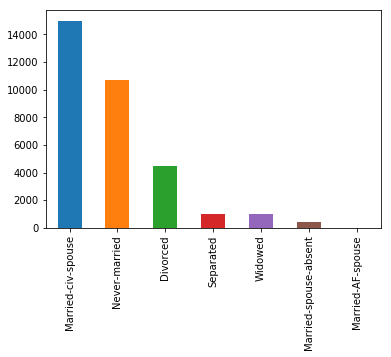

In [69]:
# visualize the results
adults.marital_status.value_counts().plot(kind = 'bar')

In [304]:
adults.age.sort_values(ascending = True)
adults.age.describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [305]:
adults.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_binary
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


Text(0.5,1,'Histogram for Age Distribution')

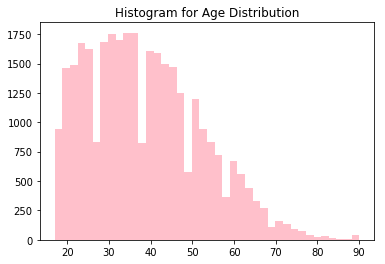

In [70]:
x,y,z = plt.hist(adults['age'],bins = 40, color = 'pink')
plt.title('Histogram for Age Distribution')

In [73]:
# create a new column for the target variable. If income more than >50K, 1 else 0 
adults['income_binary'] = adults.income.apply(lambda x: 1 if x == '>50K' else 0)

adults.income_binary.value_counts()

0    24720
1     7841
Name: income_binary, dtype: int64

Text(0.5,1,'Income')

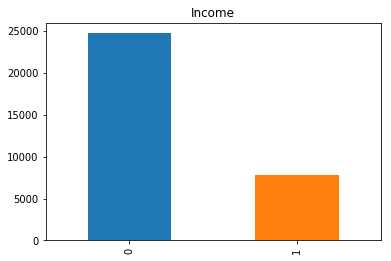

In [74]:
adults.income_binary.value_counts().plot(kind = 'bar')
plt.title('Income')

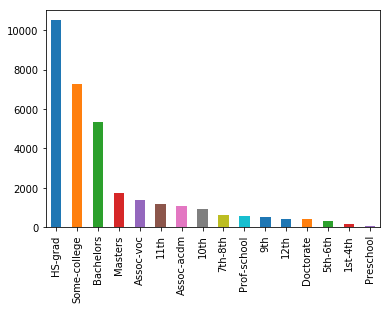

In [75]:
adults.education.value_counts().plot(kind = 'bar')

In [76]:
# examine correlations
adults.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_binary
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
income_binary,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


In [77]:
# summary statistics
adults.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_binary
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [109]:
grouped_by_marital = adults.groupby('marital_status').income_binary.value_counts().unstack('income_binary')


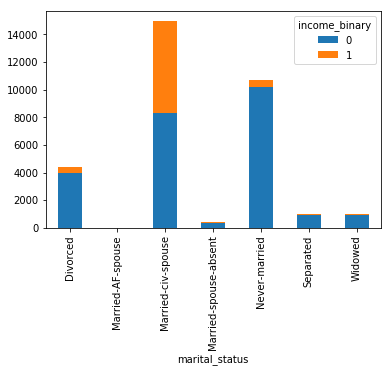

In [110]:
# plot a stacked barplot 
grouped_by_marital.columns
grouped_by_marital[[0,1]].plot(kind = 'bar',stacked = True)

In [119]:
# trying more groupby stuff 
grouped_by_gender = adults.groupby('sex').income_binary.value_counts().unstack()

In [120]:
grouped_by_gender

income_binary,0,1
sex,,
Female,9592,1179
Male,15128,6662


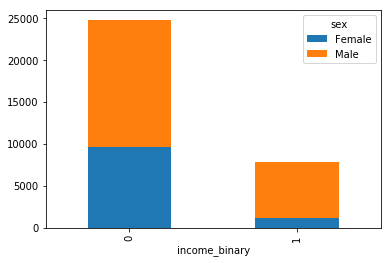

In [113]:
grouped_by_gender.plot(kind = 'bar',stacked = True)

__Conclusion__:<br>
With the help of Pandas, we can manipulate, subset, and extract insights from paneled data with ease. Questions such as "what is the average age of women who get paid more than 50K?", "What is the most common occupation for achieving income higher than 50k?". Pandas allows us to perform exploratory data analysis and detect pattern in our data. Tomorrow, we will cover a deep dive into advanced pandas tabular data manipulation and working with multiple tables. 

Additional Resources:
- [Pandas Cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- [10 Minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#min)
- [Pandas Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization)
- [Data Analysis with Pandas by Kevin Markham](https://www.youtube.com/watch?v=yzIMircGU5I&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y)